# Diabetes Health Monitoring

Team Members:

Srikanth, Prasanth

**Step -1 : importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Step -2: Loading dataset**

In [3]:

import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_5022ebd052cb493da82d0f09840119df = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DMMNhzi-atYLYCQMpwLK7mxFvl-fRNLO3_JeYzYiBysy',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_5022ebd052cb493da82d0f09840119df.get_object(Bucket='batch2-donotdelete-pr-jqe78ba82u2s6i',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Step - 3 : Data Preprocessing**
- check for misssing values
- check for categorical values

In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


> ***Extracting independent and dependent variables***

In [5]:
X = dataset.iloc[:,:-1].values # independent variable
y = dataset.iloc[:,-1].values # dependent variable

> ***Checking for data spread*** 

> **Box Plot Visualize**

In [6]:
plt.style.use('fivethirtyeight')

In [7]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

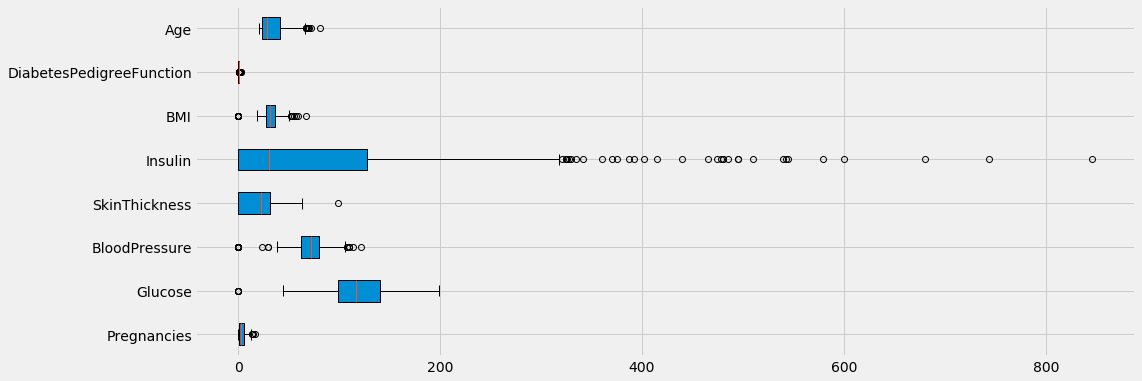

In [8]:
fig = plt.figure(figsize=(15,6))
plt.boxplot(X, vert = False,labels= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                      'BMI', 'DiabetesPedigreeFunction', 'Age'], patch_artist=True)
plt.show()

> ***Check Relation between each variables ***

> **Correlation**

In [9]:
corr = dataset.corr()

In [10]:
import seaborn as sns

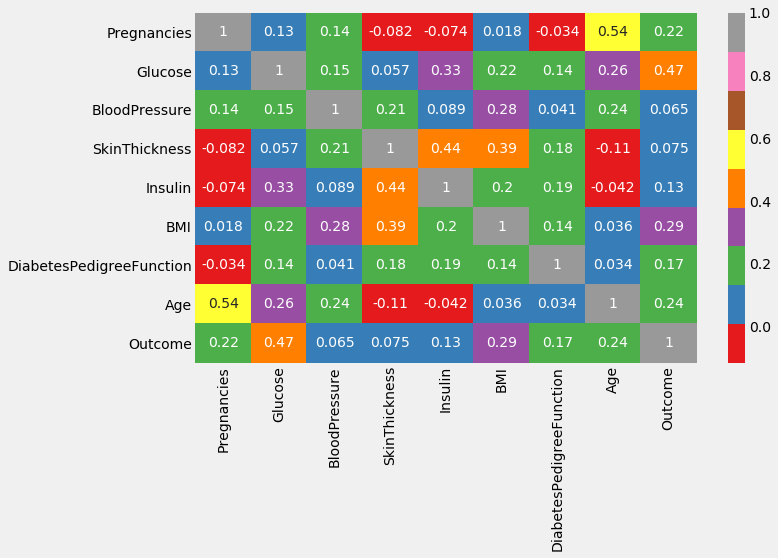

In [11]:
plt.figure(figsize = (10,6))
sns.heatmap(corr,annot = True,cmap = 'Set1')
plt.show()

> ***Min Max Scaling***

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
sc = MinMaxScaler(feature_range=(0,1))

In [14]:
X_new = sc.fit_transform(X)
X_new

array([[ 0.35294118,  0.74371859,  0.59016393, ...,  0.50074516,
         0.23441503,  0.48333333],
       [ 0.05882353,  0.42713568,  0.54098361, ...,  0.39642325,
         0.11656704,  0.16666667],
       [ 0.47058824,  0.91959799,  0.52459016, ...,  0.34724292,
         0.25362938,  0.18333333],
       ..., 
       [ 0.29411765,  0.6080402 ,  0.59016393, ...,  0.390462  ,
         0.07130658,  0.15      ],
       [ 0.05882353,  0.63316583,  0.49180328, ...,  0.4485842 ,
         0.11571307,  0.43333333],
       [ 0.05882353,  0.46733668,  0.57377049, ...,  0.45305514,
         0.10119556,  0.03333333]])

In [61]:
X_new[0]

array([ 0.35294118,  0.74371859,  0.59016393,  0.35353535,  0.        ,
        0.50074516,  0.23441503,  0.48333333])

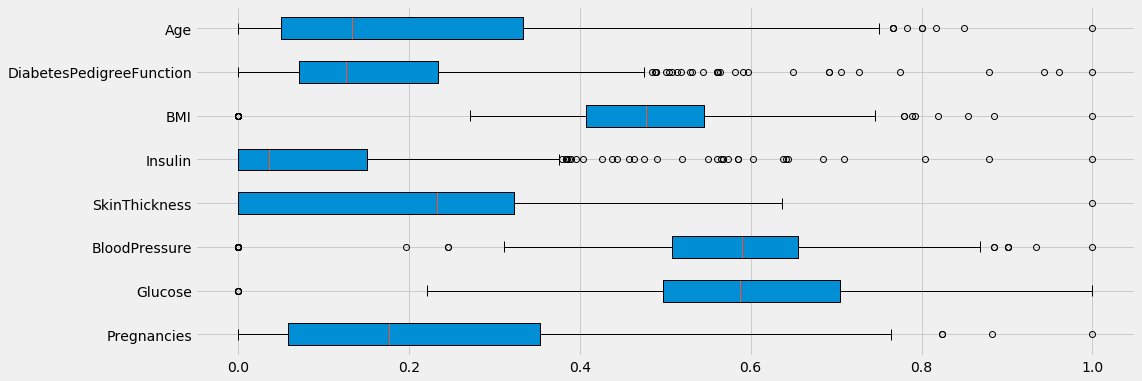

In [15]:
fig = plt.figure(figsize=(15,6))
plt.boxplot(X_new, vert = False,labels= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                      'BMI', 'DiabetesPedigreeFunction', 'Age'], patch_artist=True)
plt.show()

In [16]:
mx = sc.data_max_
mn = sc.data_min_

In [17]:
np.savez('scale.npz',mn,mx)

In [18]:
print(mx)
print(mn)

[  17.    199.    122.     99.    846.     67.1     2.42   81.  ]
[  0.      0.      0.      0.      0.      0.      0.078  21.   ]


**Step -4: Spliting data into traning and testing set**

In [19]:
from sklearn.cross_validation import train_test_split

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size = 0.2,
                                                   random_state =0 )

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((614, 8), (154, 8), (614,), (154,))

** Step -5: Building Machine Learning Mode -> MultinomialNB, GaussianNB**

In [22]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
model_log = LogisticRegression(C = 10.0)
model_knn = KNeighborsClassifier(n_neighbors=3)
model_svm = SVC(C = 10.0,probability=True) 
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_nb = MultinomialNB(alpha = 1)

*traning*

In [24]:
model_log.fit(x_train, y_train) # training model
model_knn.fit(x_train, y_train) # training model
model_svm.fit(x_train, y_train) # training model
model_dt.fit(x_train, y_train) # training model
model_rf.fit(x_train, y_train) # training model
model_nb.fit(x_train, y_train) # traning model

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

**Step - 6 : Evaluation**

In [25]:
y_pred_log = model_log.predict(x_test) # we use this for evaluation
y_pred_knn = model_knn.predict(x_test) # we use this for evaluation
y_pred_svm = model_svm.predict(x_test) # we use this for evaluation
y_pred_dt = model_dt.predict(x_test) # we use this for evaluation
y_pred_rf = model_rf.predict(x_test) # we use this for evaluation
y_pred_nb = model_rf.predict(x_test) # we use this for evaluation

*classification metric*

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
cm_log = confusion_matrix(y_test, y_pred_log) # confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn) # confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm) # confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt) # confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf) # confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb) # confusion matrix


cr_log = classification_report(y_test, y_pred_log) # classification report
cr_knn = classification_report(y_test, y_pred_knn) # classification report
cr_svm = classification_report(y_test, y_pred_svm) # classification report
cr_dt = classification_report(y_test, y_pred_dt) # classification report
cr_rf = classification_report(y_test, y_pred_rf) # classification report
cr_nb = classification_report(y_test, y_pred_nb) # classification report

In [28]:
import seaborn as sns

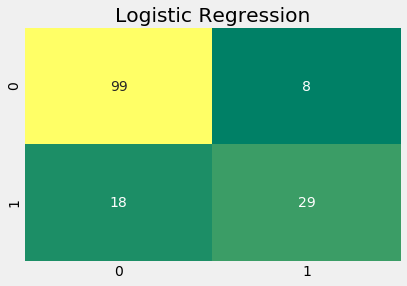

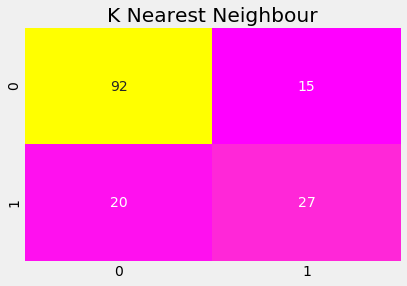

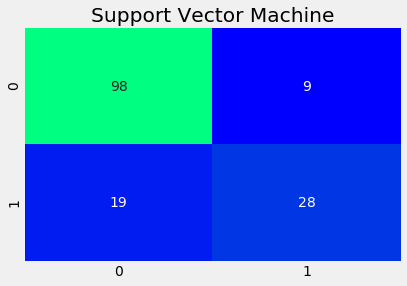

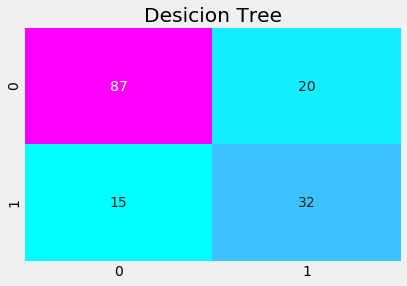

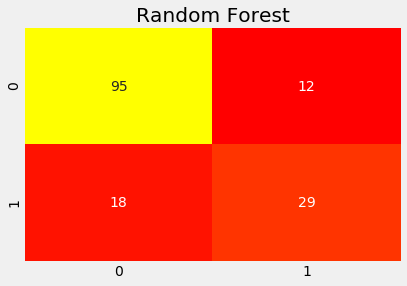

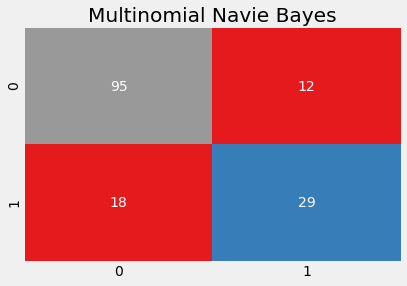

In [29]:
sns.heatmap(cm_log,annot=True,cbar=None,cmap = 'summer')
plt.title('Logistic Regression')
plt.show()
sns.heatmap(cm_knn,annot=True,cbar=None,cmap = 'spring')
plt.title('K Nearest Neighbour')
plt.show()
sns.heatmap(cm_svm,annot=True,cbar=None,cmap = 'winter')
plt.title('Support Vector Machine')
plt.show()
sns.heatmap(cm_dt,annot=True,cbar=None,cmap = 'cool')
plt.title('Desicion Tree')
plt.show()
sns.heatmap(cm_rf,annot=True,cbar=None,cmap = 'autumn')
plt.title('Random Forest')
plt.show()
sns.heatmap(cm_nb,annot=True,cbar=None,cmap = 'Set1')
plt.title('Multinomial Navie Bayes')
plt.show()

In [30]:
print('='*20+'Logistic Regression'+'='*20)
print(cr_log)
print('='*20+'KNearest Neighbour'+'='*20)
print(cr_knn)
print('='*20+'Support Vector Machine'+'='*20)
print(cr_svm)
print('='*20+'Descion Tree'+'='*20)
print(cr_dt)
print('='*20+'Random Forest'+'='*20)
print(cr_rf)
print('='*20+'Multinomial NB'+'='*20)
print(cr_nb)

====================Logistic Regression====================
             precision    recall  f1-score   support

          0       0.85      0.93      0.88       107
          1       0.78      0.62      0.69        47

avg / total       0.83      0.83      0.82       154

====================KNearest Neighbour====================
             precision    recall  f1-score   support

          0       0.82      0.86      0.84       107
          1       0.64      0.57      0.61        47

avg / total       0.77      0.77      0.77       154

====================Support Vector Machine====================
             precision    recall  f1-score   support

          0       0.84      0.92      0.88       107
          1       0.76      0.60      0.67        47

avg / total       0.81      0.82      0.81       154

====================Descion Tree====================
             precision    recall  f1-score   support

          0       0.85      0.81      0.83       107
          1  

# Watson Machine Learning Deployment

### Work with your WML instance<a id="work"></a>

First, you must import client libraries.

In [31]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2018-05-31 06:06:09,372 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Error: {"trace":"2004212095","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}


In [43]:
wml_credentials ={
  "username": "c2093216-62c2-4a63-8bc1-0c6ef066ecab",
  "password": "bd5908e3-3f2b-4970-b17a-0c809b829cb3",
  "instance_id": "975d53b1-34c4-4332-a0c9-e4dfee254cfb",
  "url": "https://ibm-watson-ml.eu-gb.bluemix.net"
}

#### Create the API client. 

In [44]:
client = WatsonMachineLearningAPIClient(wml_credentials)

#### Get instance details.

In [45]:
import json

instance_details = client.service_instance.get_details()

### 4.2 Save the model to the WML repository<a id="save"></a>

Define the model name, author name and email.

In [46]:
published_model = client.repository.store_model(model=model_nb, meta_props={'name':'Diabetes'}, \
                                                training_data=x_train, training_target=y_train)

#### Get information about a specific model in the WML repository.

In [47]:
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)

print(json.dumps(model_details, indent=2))

{
  "metadata": {
    "url": "https://ibm-watson-ml.eu-gb.bluemix.net/v3/wml_instances/975d53b1-34c4-4332-a0c9-e4dfee254cfb/published_models/08864136-e609-4b48-bab0-c6e3a1faaac7",
    "guid": "08864136-e609-4b48-bab0-c6e3a1faaac7",
    "modified_at": "2018-05-31T06:10:40.873Z",
    "created_at": "2018-05-31T06:10:40.817Z"
  },
  "entity": {
    "name": "Diabetes",
    "deployments": {
      "count": 0,
      "url": "https://ibm-watson-ml.eu-gb.bluemix.net/v3/wml_instances/975d53b1-34c4-4332-a0c9-e4dfee254cfb/published_models/08864136-e609-4b48-bab0-c6e3a1faaac7/deployments"
    },
    "latest_version": {
      "url": "https://ibm-watson-ml.eu-gb.bluemix.net/v3/ml_assets/models/08864136-e609-4b48-bab0-c6e3a1faaac7/versions/2c0d862c-4daf-4407-bd5c-2bc2c87d78c1",
      "guid": "2c0d862c-4daf-4407-bd5c-2bc2c87d78c1",
      "created_at": "2018-05-31T06:10:40.873Z"
    },
    "learning_configuration_url": "https://ibm-watson-ml.eu-gb.bluemix.net/v3/wml_instances/975d53b1-34c4-4332-a0c9-e4dfe

#### Get information about all of the models in the WML repository.

In [48]:
models_details = client.repository.list_models()

------------------------------------  --------  ------------------------  -----------------
GUID                                  NAME      CREATED                   FRAMEWORK
08864136-e609-4b48-bab0-c6e3a1faaac7  Diabetes  2018-05-31T06:10:40.817Z  scikit-learn-0.19
------------------------------------  --------  ------------------------  -----------------


### 4.3 Load a model from the WML repository<a id="load"></a>

In this subsection you will learn how to load a saved model from a specific WML instance.

In [49]:
loaded_model = client.repository.load(published_model_uid)

Make test predictions to check that the model has been loaded correctly.

In [50]:
test_predictions = loaded_model.predict(x_test[:5])

In [51]:
print(test_predictions)

[0 0 0 0 0]


As you can see you are able to make predictions, which means that the model has loaded correctly. You have now  learned how save to and load the model from the WML repository.

### 4.4 Delete a model from the WML repository<a id="delete"></a>

The code in the following cell deletes a published model from the WML repository. The code is commented out at this stage because you still need the model for deployment.

In [52]:
# client.repository.delete(published_model_uid)

<a id="scoring"></a>
## 5. Deploy and score data in the IBM Cloud

### 5.1 Create the online deployment for the published model<a id="create"></a>

In [53]:
created_deployment = client.deployments.create(published_model_uid, "Health")



#######################################################################################

Synchronous deployment creation for uid: '81dc6135-3f78-4a3b-a281-48534dd3f96e' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='81dc6135-3f78-4a3b-a281-48534dd3f96e'
------------------------------------------------------------------------------------------------




**Note**: Here you use the deployment url saved in published_model object. The next section shows you how to retrieve the deployment url from WML instance.

Now you can define and print an online scoring endpoint. 

In [54]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)

print(scoring_endpoint)

https://ibm-watson-ml.eu-gb.bluemix.net/v3/wml_instances/975d53b1-34c4-4332-a0c9-e4dfee254cfb/published_models/08864136-e609-4b48-bab0-c6e3a1faaac7/deployments/81dc6135-3f78-4a3b-a281-48534dd3f96e/online


### 5.2 Get deployments<a id="getdeploy"></a>

In [55]:
deployments = client.deployments.get_details()

You can get the deployment_url by parsing the deployment details for the last deployed model.

In [56]:
deployment_url = client.deployments.get_url(created_deployment)

print(deployment_url)

https://ibm-watson-ml.eu-gb.bluemix.net/v3/wml_instances/975d53b1-34c4-4332-a0c9-e4dfee254cfb/published_models/08864136-e609-4b48-bab0-c6e3a1faaac7/deployments/81dc6135-3f78-4a3b-a281-48534dd3f96e


In [57]:
score_data = x_train[0:2]

In [58]:
scoring_payload = {"values": [list(score_data[0]), list(score_data[1])]}

In [59]:
predictions = client.deployments.score(scoring_endpoint, scoring_payload)

In [60]:
print(json.dumps(predictions, indent=2))

{
  "values": [
    [
      0,
      [
        0.6156884107336862,
        0.3843115892663137
      ]
    ],
    [
      0,
      [
        0.6526731166151544,
        0.3473268833848455
      ]
    ]
  ],
  "fields": [
    "prediction",
    "probability"
  ]
}
